## 전통시장 위치와 편의시설

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 한글, -(마이너스) 깨짐 없이 보기
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [4]:
# 폰트가 선명하게 보이도록 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글폰트'}>

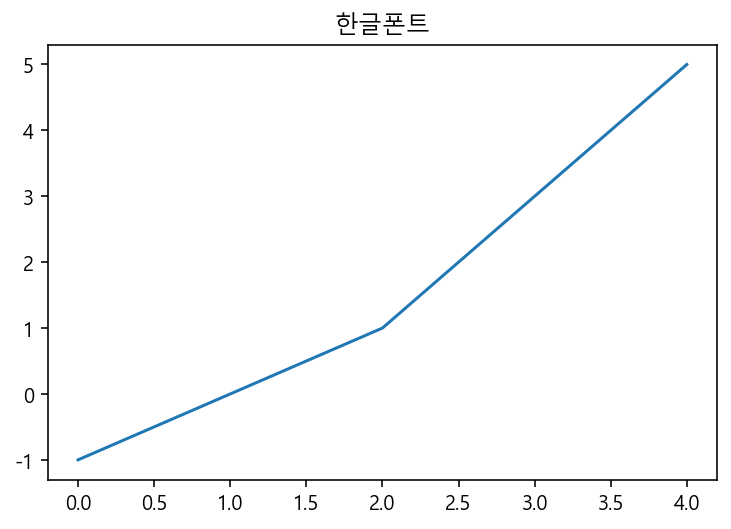

In [5]:
# 확인
pd.Series([-1, 0, 1, 3, 5]).plot(title="한글폰트")

In [6]:
# 위경도 포함된 데이터 불러오기
df1 = pd.read_csv("data/서울시 전통시장 현황.csv", encoding='CP949')
df1.shape

(330, 6)

In [7]:
df1.head(1)

,자치구 코드,자치구명,전통시장명,주소명,위도,경도
0,22,은평구,갈현시장,갈현동 424-16,37.623587,126.917385


In [8]:
df1.isnull().sum()

자치구 코드    0
자치구명      0
전통시장명     0
주소명       0
위도        0
경도        0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   자치구 코드  330 non-null    int64  
 1   자치구명    330 non-null    object 
 2   전통시장명   330 non-null    object 
 3   주소명     330 non-null    object 
 4   위도      330 non-null    float64
 5   경도      330 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 15.6+ KB


In [12]:
# df 1 컬럼 정리
columns1 = ['자치구명', '전통시장명', '주소명', '경도', '위도']

df1 = df1[columns1].copy()
df1.shape

(330, 5)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   자치구명    330 non-null    object 
 1   전통시장명   330 non-null    object 
 2   주소명     330 non-null    object 
 3   경도      330 non-null    float64
 4   위도      330 non-null    float64
dtypes: float64(2), object(3)
memory usage: 13.0+ KB


In [14]:
# 컬럼 이름 변경
df1.columns = ['구', '시장명', '주소명', '경도', '위도']
df1.head()

,구,시장명,주소명,경도,위도
0,은평구,갈현시장,갈현동 424-16,126.917385,37.623587
1,강남구,강남시장,신사동510-11,126.953488,37.496746
2,동작구,강남시장,상도동 488,127.020640,37.518749
3,강남구,강남역 지하도상가,역삼동821-1,127.028026,37.498595
4,서초구,강남터미널지하도상점가1구역,서초구 반포동 163,126.986060,37.500478


In [16]:
# 시장 이름에 '시장'이 들어가는 데이터만 보기

df_market = df1["시장명"].str.contains("시장").copy()
df_market.value_counts()

True     263
False     67
Name: 시장명, dtype: int64

In [18]:
# 시장 이름에 '시장'이 들어가는 데이터만 추출

df_mk = df1.loc[df1["시장명"].str.contains("시장")].copy()
df_mk.head(10)

,구,시장명,주소명,경도,위도
0,은평구,갈현시장,갈현동 424-16,126.917385,37.623587
1,강남구,강남시장,신사동510-11,126.953488,37.496746
2,동작구,강남시장,상도동 488,127.020640,37.518749
7,강북구,강북종합골목시장,수유3동 177번지 일대,127.027052,37.640568
8,강북구,강북종합시장,수유3동 179-5,127.025634,37.642037
9,구로구,개봉중앙시장,개봉2동 324-1,126.853884,37.491665
13,동대문구,경동시장,제기동 1018,127.039542,37.578912
14,양천구,경창시장,양천구 신월동 447-8,126.842090,37.524924
15,강동구,고덕전통시장,고덕동 210-3,127.168918,37.557587
17,구로구,고척근린시장,고척동 257-12,126.850506,37.502404


<AxesSubplot:xlabel='구', ylabel='count'>

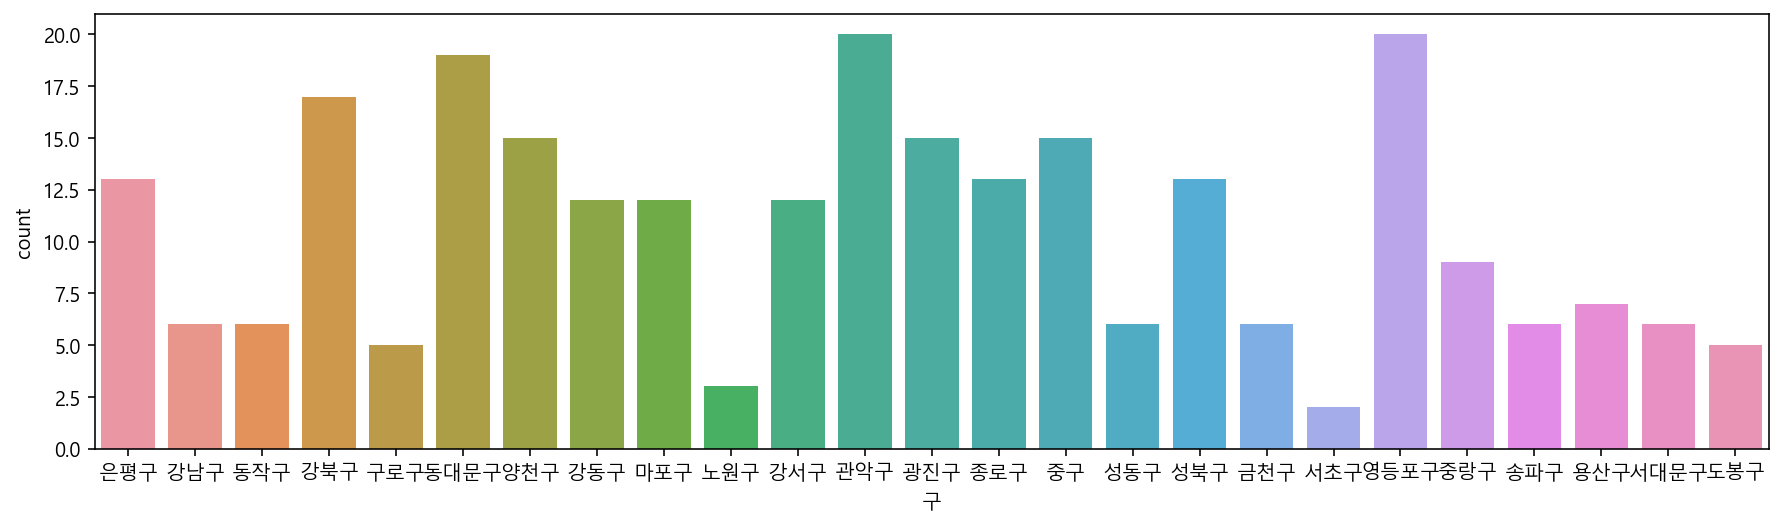

In [19]:
# 구별 시장 수 막대그래프

plt.figure(figsize=(15, 4))
sns.countplot(data=df_mk, x="구")

<AxesSubplot:xlabel='경도', ylabel='위도'>

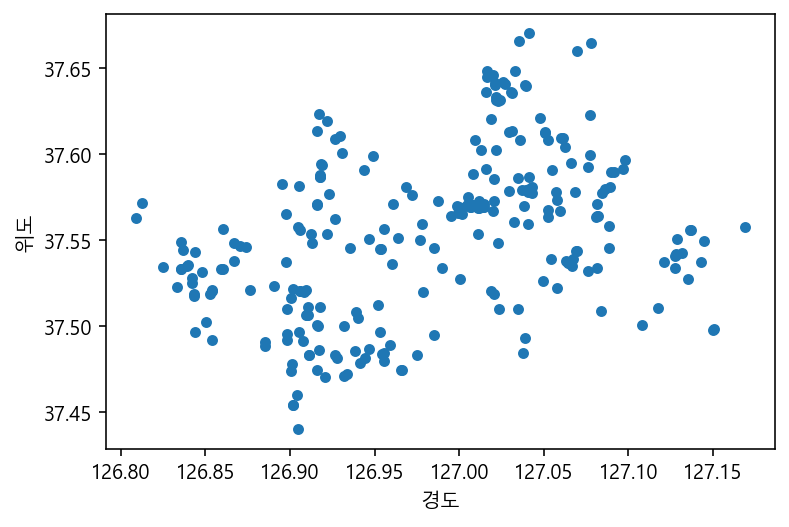

In [20]:
df_mk[["위도", "경도"]].plot.scatter(x="경도", y="위도")

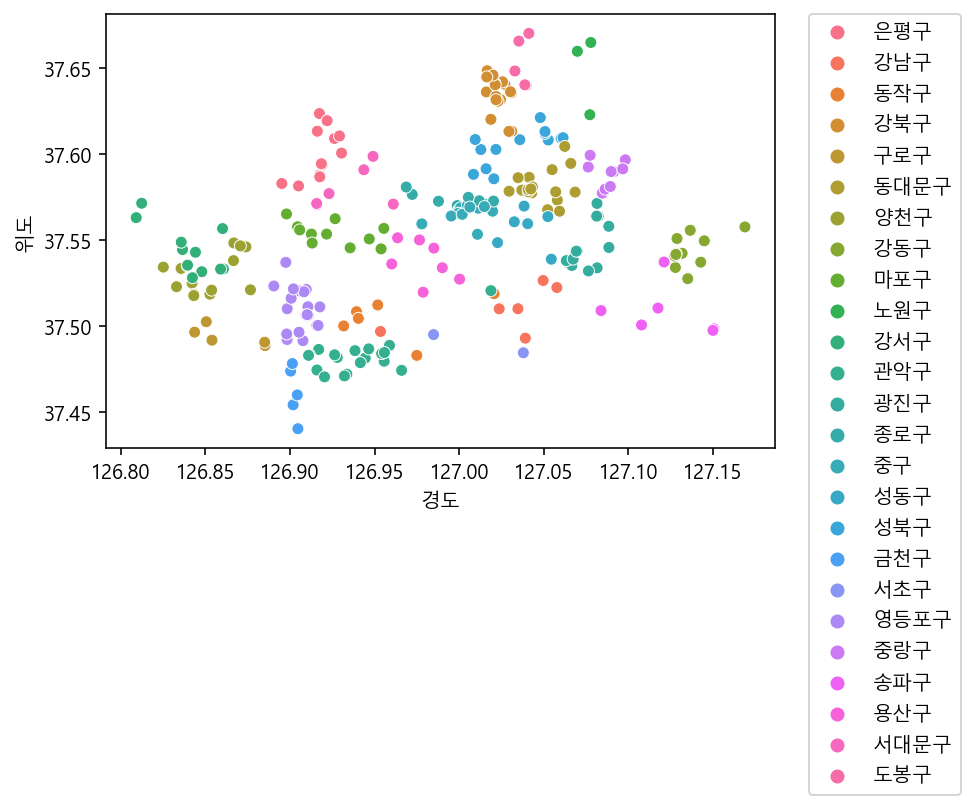

In [21]:
sns.scatterplot(data=df_mk, x="경도", y="위도", hue="구")

# 레전드값 옆으로
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [22]:
# 편의시설 데이터 불러오기
df2 = pd.read_csv('data/전통시장현황_20200226..csv', encoding='CP949')
df2.shape

(1450, 76)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 76 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   시장형태                                                                 1450 non-null   object 
 1   등록형태                                                                 1450 non-null   object 
 2   시도                                                                   1450 non-null   object 
 3   시군구                                                                  1450 non-null   object 
 4   시장명                                                                  1450 non-null   object 
 5   주소(지번)                                                               1450 non-null   object 
 6   주소(도로명)                                                              1450 non-null   object 
 7   시장크기 (

In [24]:
# 컬럼 보기
df2.columns

Index(['시장형태', '등록형태', '시도', '시군구', '시장명', '주소(지번)', '주소(도로명)',
       '시장크기 (1=대형시장, 2=중대형시장, 3=중형시장, 4=소형시장)', '시장면적(단위선택: 1=제곱미터, 2=평형)',
       '시장면적(㎡)', '시장면적(평)', '소유형태(1=법인시장, 2=개인시장, 3=공설시장, 4=공동시장)',
       '외부형태(전통시장: 1=상가건물형, 2=노점형, 3=장옥형, 4=상가주택형)',
       '개설주기(1=상설, 2=정기, 3=상설+정기)', ' 정기(장날1)', ' 정기(장날2)', '상설+정기(장날1)',
       ' 상설+정기(장날2)', '전체점포수', '영업점포수(합)', '영업점포수(임차점포수)', '비영업 점포수(빈점포)',
       '비영업 점포수(기타점포)', ' 노점수', '2017년-점포소유상인', '2017년-점포임차상인', '2017년-종업원수',
       '2017년-노점상인수', '2017년-총시장상인', ' 상인회 운영여부(1=운영, 2=미운영)',
       ' 상인회 조직형태(1=시군구청 등록 상인회, 2=상점가진흥조합, 3=사업조합 또는 협동조합, 4=사단법인, 5=임의단체)',
       '상근직원 명수', '상인회 회원 수', '보유현황 - 1고객지원센터(1=있음, 2=없음)',
       '보유현황 - 2유아놀이방(어린이놀이터)(1=있음, 2=없음)', '보유현황 - 4고객휴게실(1=있음, 2=없음)',
       '보유현황 - 5수유센터(1=있음, 2=없음)', '보유현황 - 6물품보관함(1=있음, 2=없음)',
       '보유현황 - 7자전거보관함(1=있음, 2=없음)', '보유현황 - 10쇼핑카트(1=있음, 2=없음)',
       '문2) 보유현황 - 12고객동선통로(1=있음, 2=없음)', '보유현황 - 16시장전용 고객주차장(1=있음, 2=없음)',
       '보유갯수 - 16시장전용 고객주차장',

<AxesSubplot:>

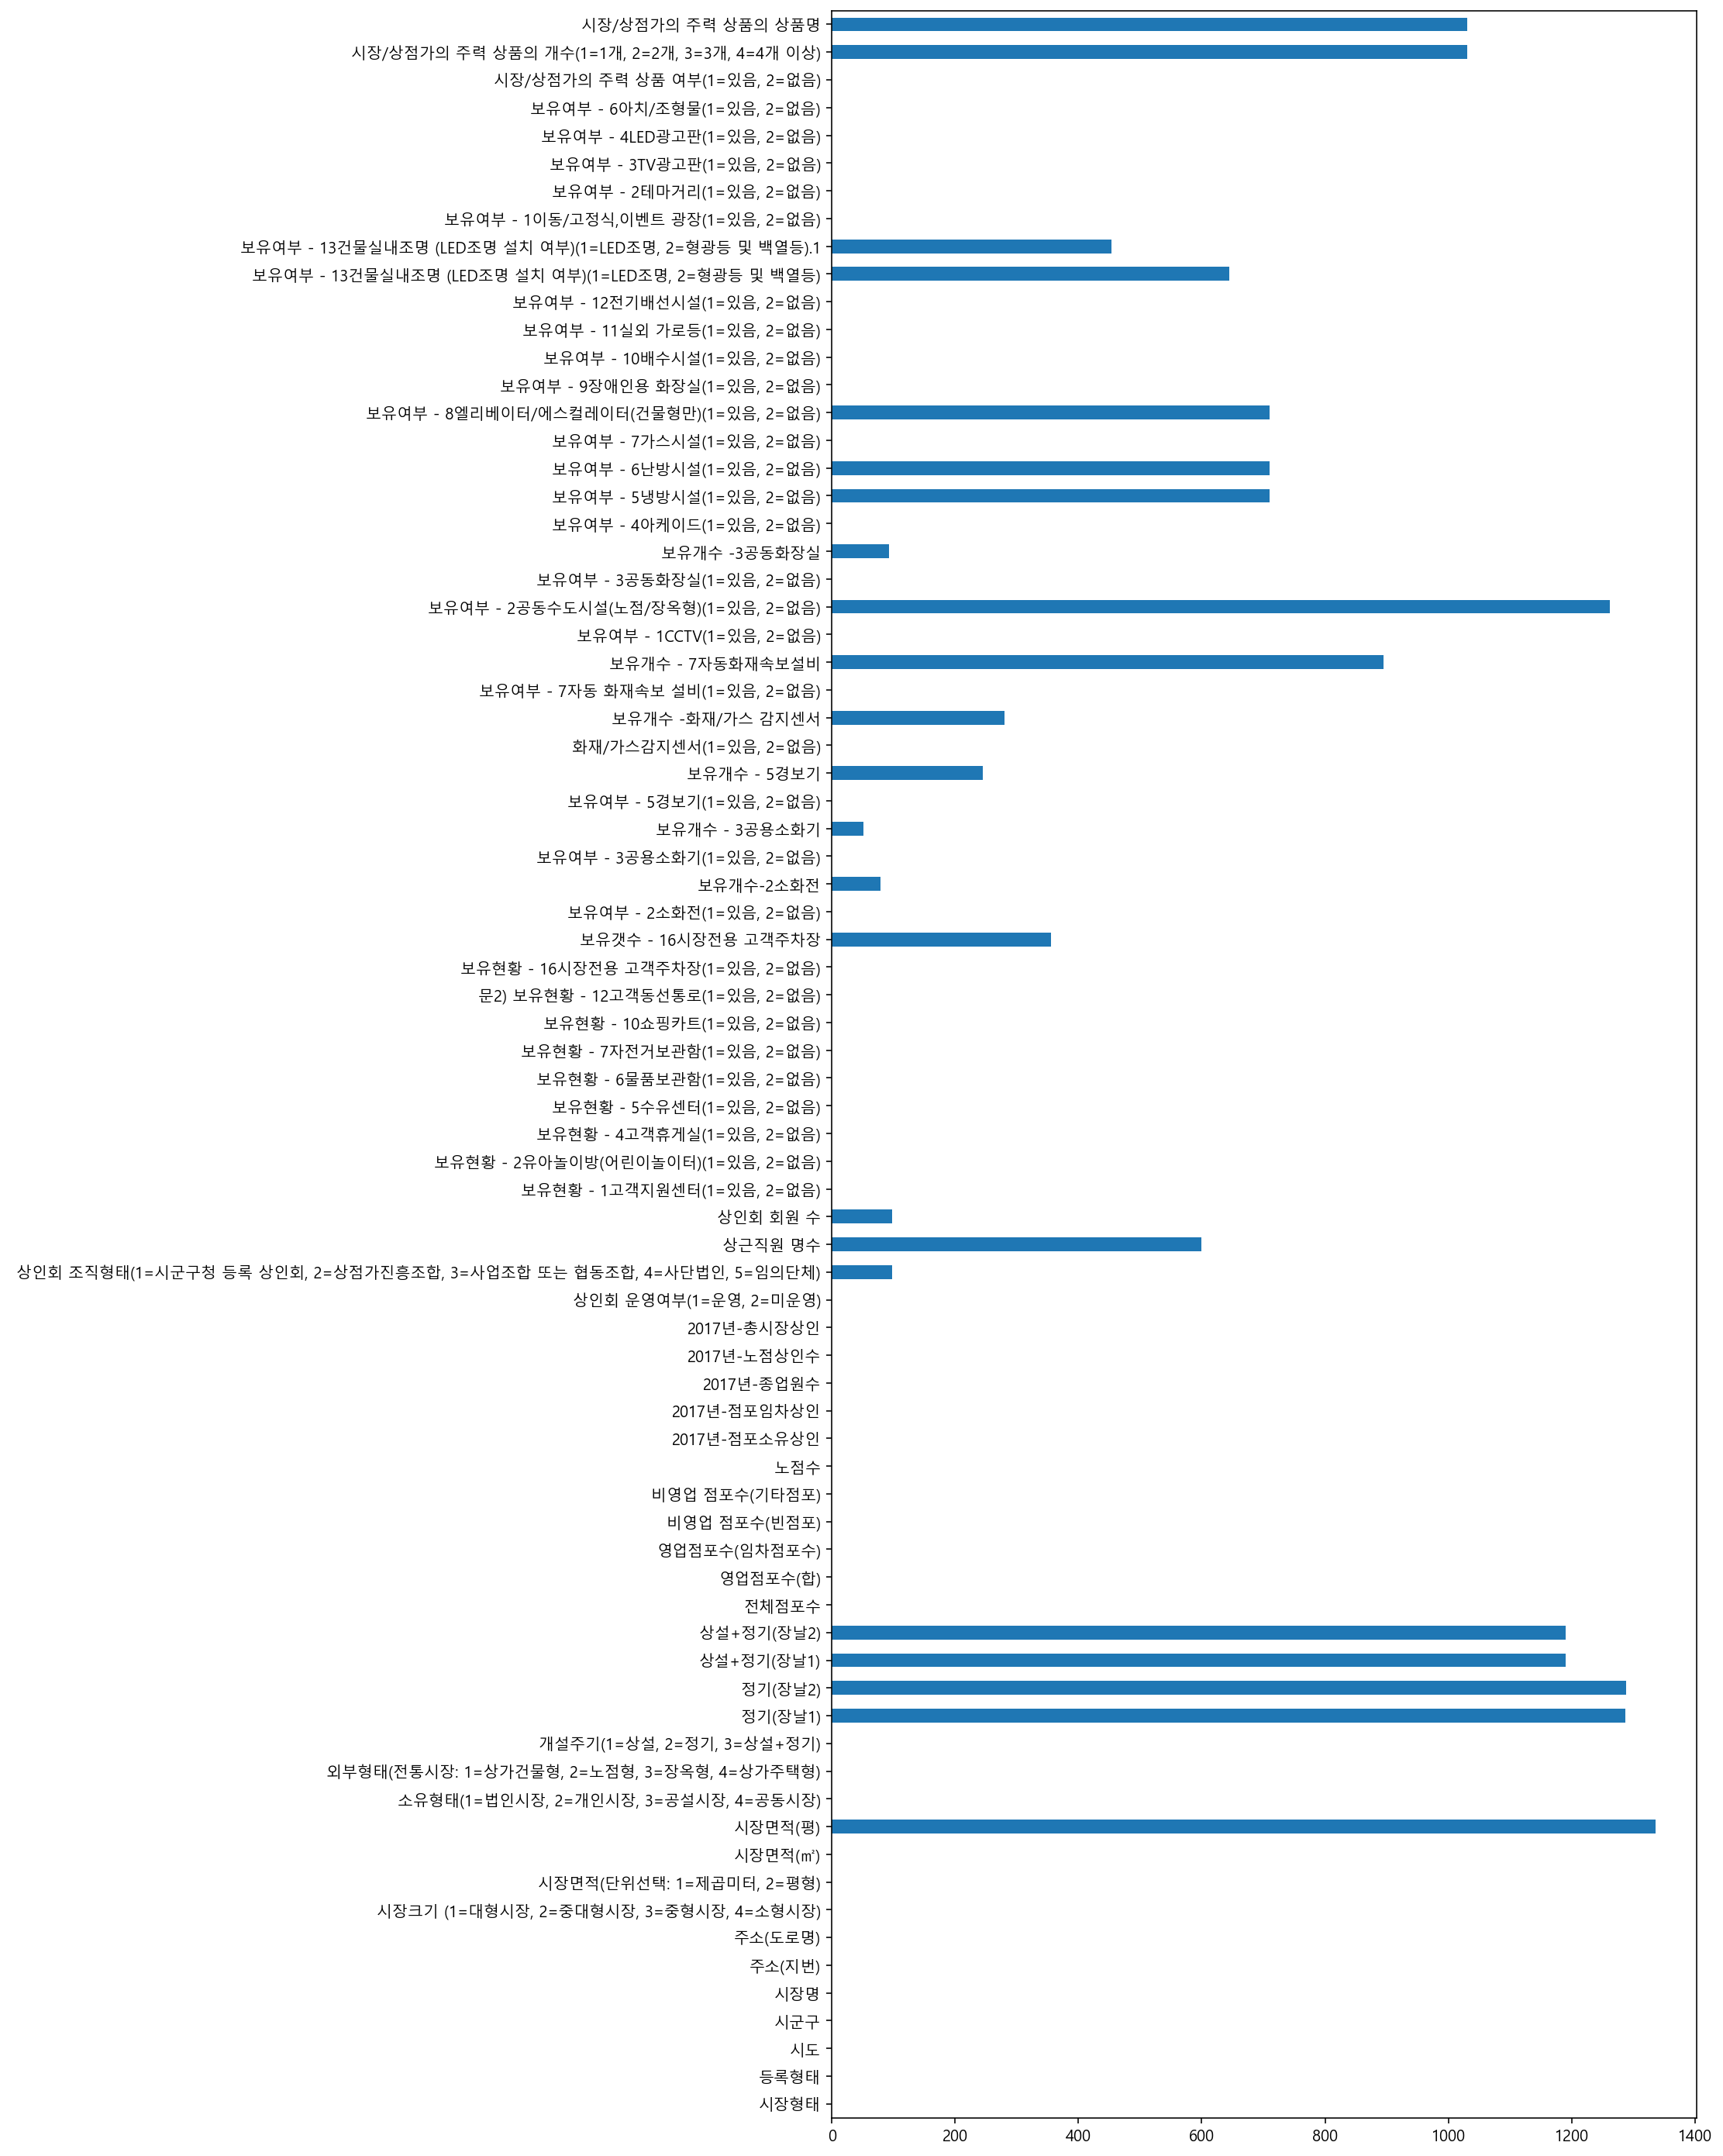

In [25]:
# 결측치 보기
df2.isnull().sum().plot.barh(figsize=(10,25))

In [34]:
# 주력 상품 결측치 보기

df2["시장/상점가의 주력 상품의 상품명"].isnull().value_counts()

True     1031
False     419
Name: 시장/상점가의 주력 상품의 상품명, dtype: int64

In [51]:
# 사용할 컬럼만 지정
columns2 = ['시장명','시군구','시도', '보유갯수 - 16시장전용 고객주차장',
           '시장/상점가의 주력 상품 여부(1=있음, 2=없음)','보유현황 - 10쇼핑카트(1=있음, 2=없음)',
           '시장/상점가의 주력 상품의 상품명']

In [52]:
# 컬럼 줄어든 것 확인
df2 = df2[columns2].copy()
df2.shape

(1450, 7)

In [28]:
# 메모리 줄어든 것 확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   시장명                           1450 non-null   object 
 1   시군구                           1450 non-null   object 
 2   시도                            1450 non-null   object 
 3   보유갯수 - 16시장전용 고객주차장           1095 non-null   float64
 4   시장/상점가의 주력 상품 여부(1=있음, 2=없음)  1450 non-null   int64  
 5   보유현황 - 10쇼핑카트(1=있음, 2=없음)     1450 non-null   int64  
 6   시장/상점가의 주력 상품의 상품명            419 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 79.4+ KB


In [29]:
# 시도가 서울인 것만 사용

df_seoul = df2[df2["시도"] == "서울"].copy()
df_seoul.shape

(211, 7)

In [30]:
# 시장명에 '시장'이 들어가는 것만

df_seoul = df_seoul[df_seoul["시장명"].str.contains("시장")]
df_seoul

,시장명,시군구,시도,보유갯수 - 16시장전용 고객주차장,"시장/상점가의 주력 상품 여부(1=있음, 2=없음)","보유현황 - 10쇼핑카트(1=있음, 2=없음)",시장/상점가의 주력 상품의 상품명
848,강남시장,강남구,서울,1.0,2,2,NaN
849,논현종합시장,강남구,서울,1.0,2,2,NaN
851,영동전통시장,강남구,서울,1.0,2,2,NaN
852,청담삼익시장,강남구,서울,1.0,2,2,NaN
853,고덕전통시장,강동구,서울,1.0,2,2,NaN
...,...,...,...,...,...,...,...
1051,면목골목시장,중랑구,서울,1.0,2,2,NaN
1052,면목시장,중랑구,서울,1.0,2,2,NaN
1053,사가정시장,중랑구,서울,NaN,2,2,NaN
1055,우림골목시장,중랑구,서울,2.0,2,1,NaN


In [32]:
df_seoul[df_seoul["시장명"]=="강남시장"]

,시장명,시군구,시도,보유갯수 - 16시장전용 고객주차장,"시장/상점가의 주력 상품 여부(1=있음, 2=없음)","보유현황 - 10쇼핑카트(1=있음, 2=없음)",시장/상점가의 주력 상품의 상품명
848,강남시장,강남구,서울,1.0,2,2,NaN
941,강남시장,동작구,서울,NaN,2,2,NaN


In [35]:
df_mk[df_mk["시장명"]=="강남시장"]

,구,시장명,주소명,경도,위도
1,강남구,강남시장,신사동510-11,126.953488,37.496746
2,동작구,강남시장,상도동 488,127.020640,37.518749


In [54]:
# 두 데이터 프레임을 '시장명'을 기준으로 합치기

# 병합할 컬럼의 이름이 '시장명'으로 같으므로 
# left_on='시장명', right_on='시장명' 옵션은 생략

df = pd.merge(df_mk, df_seoul).copy()
df.shape

(145, 11)

In [40]:
# 두 데이터의 차집합 보기
set(df_mk['시장명'].unique()) - set(df_seoul['시장명'].unique())

{'갈현시장',
 '강북종합골목시장',
 '강북종합시장',
 '고척근린시장',
 '공릉동 도깨비시장',
 '공항시장',
 '관악신사시장(신림4동)',
 '광장골목시장',
 '광희시장',
 '구의시장',
 '굽은다리골목시장',
 '금천교시장',
 '길동골목시장',
 '깡통시장(제기상가번영회)',
 '낙성대 시장(봉천7동)',
 '낙원지하시장(대일상가)',
 '남구로시장(구 구로자율시장)',
 '노룬산골목시장',
 '노룬산시장',
 '녹번시장',
 '능동로골목시장',
 '대명시장',
 '대명시장 및 주변상점가',
 '도림시장',
 '돈암제일시장',
 '동대문문구완구종합시장',
 '동문시장',
 '동부골목시장',
 '동부청과시장',
 '동원시장',
 '동화시장',
 '두암시장',
 '면곡골목시장',
 '명일골목시장',
 '목동제일시장',
 '미성동 도깨비시장',
 '박미시장',
 '밤나무골시장',
 '방산시장',
 '방신재래시장',
 '방천골목시장',
 '번동북부골목시장',
 '번동북부시장',
 '번동시장',
 '보문골목시장',
 '봉천신시장',
 '사가정골목시장',
 '사러가시장',
 '삼선골목시장',
 '삼성동 시장(신림6동)',
 '상계시장',
 '새석관시장',
 '서중시장',
 '성내골목시장',
 '성동용답상가시장',
 '솔샘시장(미아67동골목시장)',
 '송화골목시장',
 '수유전통시장(구)수유골목시장',
 '수유중앙골목시장',
 '수일시장',
 '신길시장',
 '신노량진시장',
 '신동시장',
 '신수시장',
 '신영사러가시장',
 '신영시장',
 '신원시장(신림1동)',
 '신월3동 골목시장',
 '신월6동 골목시장',
 '신월7동 골목시장',
 '신정1동 골목시장',
 '신정2동 골목시장',
 '신정3동 골목시장',
 '신정제일시장',
 '신흥시장',
 '쌍문역골목시장',
 '쑥고개 시장(봉천8동)',
 '아리랑시장',
 '아현골목시장',
 '양남시장',
 '양지골목시장',
 '양지시장',
 '양지종합시장',
 '양평시장',
 '역삼종합시장',
 '역

In [41]:
# 두 데이터의 차집합 보기
set(df_seoul['시장명'].unique()) - set(df_mk['시장명'].unique()) 

{'㈜사러가시장',
 '가리봉시장',
 '강북북부시장',
 '강북종합전통시장',
 '고분다리전통시장',
 '공릉동도깨비시장',
 '관악신사시장',
 '길동복조리시장',
 '남구로시장',
 '남성시장',
 '남성역골목시장',
 '노룬산골목시장(인정시장)',
 '노룬산시장(건물형)',
 '돈암시장',
 '동대문종합시장 신관(동대문쇼핑타운)',
 '동문시장㈜',
 '명일전통시장',
 '방신전통시장',
 '사가정시장',
 '상도전통시장',
 '성내전통시장',
 '성대전통시장',
 '수유전통시장(수유골목시장)',
 '신원시장',
 '신월1동신영시장',
 '신중앙시장',
 '쌍문시장',
 '아현시장',
 '용답상가시장',
 '용문전통시장',
 '우성상가시장',
 '은행나무시장',
 '인헌시장',
 '자양전통시장',
 '장위전통시장',
 '정릉아리랑시장',
 '조양시장(건물형)',
 '중곡제일전통시장(중곡제일시장)',
 '중랑동부시장(동부골목시장)',
 '청량리농수산물시장',
 '청량종합도매시장(깡통시장)',
 '펭귄시장',
 '황학시장'}

In [56]:
df["시장/상점가의 주력 상품의 상품명"].isnull().value_counts()

True     114
False     31
Name: 시장/상점가의 주력 상품의 상품명, dtype: int64

In [59]:
df

,구,시장명,주소명,경도,위도,시군구,시도,보유갯수 - 16시장전용 고객주차장,"시장/상점가의 주력 상품 여부(1=있음, 2=없음)","보유현황 - 10쇼핑카트(1=있음, 2=없음)",시장/상점가의 주력 상품의 상품명
0,강남구,강남시장,신사동510-11,126.953488,37.496746,강남구,서울,1.0,2,2,NaN
1,강남구,강남시장,신사동510-11,126.953488,37.496746,동작구,서울,NaN,2,2,NaN
2,동작구,강남시장,상도동 488,127.020640,37.518749,강남구,서울,1.0,2,2,NaN
3,동작구,강남시장,상도동 488,127.020640,37.518749,동작구,서울,NaN,2,2,NaN
4,구로구,개봉중앙시장,개봉2동 324-1,126.853884,37.491665,구로구,서울,NaN,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
140,강서구,화곡본동시장,화곡동 98-45,126.844115,37.542868,강서구,서울,NaN,1,2,족발 순대국
141,강서구,화곡중앙골목시장,강서구 화곡동 370-37,126.839317,37.535052,강서구,서울,1.0,2,2,NaN
142,광진구,화양제일골목시장,화양동 34-72,127.069252,37.543482,광진구,서울,1.0,2,2,NaN
143,동대문구,회기시장,회기동 57-22,127.054940,37.590936,동대문구,서울,NaN,2,2,NaN


In [57]:
import folium

In [58]:
long = df["경도"].mean()
lat = df["위도"].mean()

In [62]:
m = folium.Map([lat,long], zoom_start=12)

for i in df.index:
    sub_lat = df.loc[i, "위도"]
    sub_long = df.loc[i, "경도"]
    title = f'{df.loc[i, "시장명"]} ({df.loc[i, "주소명"]})'
    info =  f'{df.loc[i, "시장명"]} (주력 상품: {df.loc[i, "시장/상점가의 주력 상품의 상품명"]})'
    
    icon_color = "red"
    
    folium.Marker([sub_lat, sub_long],
                  icon=folium.Icon(color=icon_color),
                  tooltip=title,
                  popup=f'<i>{info}</i>').add_to(m)

# for문 끝나고 지도 출력
m

In [65]:
# 다른 스타일
m = folium.Map(location=[lat, long], zoom_start=12, tiles="Stamen Toner")

for i in df.index[:100]:
    tooltip = f'{df.loc[i, "시장명"]} ({df.loc[i, "시장/상점가의 주력 상품의 상품명"]})'
    lat = df.loc[i, "위도"]
    long = df.loc[i, "경도"]

    folium.CircleMarker([lat, long], tooltip=tooltip, radius=3).add_to(m)
    
m

In [78]:
# 겹친 아이콘 처리
from folium.plugins import MarkerCluster

# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경가능

m = folium.Map([lat,long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df.index:
    sub_lat = df.loc[i, "위도"]
    sub_long = df.loc[i, "경도"]
    title = f'{df.loc[i, "시장명"]} ({df.loc[i, "주소명"]})'
    info =  f'{df.loc[i, "시장명"]} (주력 상품: {df.loc[i, "시장/상점가의 주력 상품의 상품명"]}, 고객주차장 개수 : {df.loc[i, "보유갯수 - 16시장전용 고객주차장"]}, 쇼핑카트 유무(1=있음, 2=없음) : {df.loc[i, "보유현황 - 10쇼핑카트(1=있음, 2=없음)"]})'
    popup = folium.Popup(f'<i>{info}</i>', max_width=600, max_height=600)
    icon_color = "red"
    
    folium.Marker([sub_lat, sub_long],
                  icon=folium.Icon(color=icon_color),
                  popup=popup, 
                  tooltip=title).add_to(marker_cluster)

m

In [79]:
# html로 저장

m.save('서울시 전통시장 위치와 편의시설 정보.html')